In [2]:

import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image
import tensorflow as tf 
from tensorflow import keras

/Users/rohansridhar/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
print(os.listdir("/Users/rohansridhar/Desktop/rohan/internship_projects/hand_gesture"))

['.DS_Store', 'test', 'gesture_model_weights.h5', 'hand_gesture.ipynb', 'logs', 'base.model', 'train', 'gesture_model.h5']


In [4]:
train_dir = '/Users/rohansridhar/Desktop/rohan/internship_projects/hand_gesture/train/train'
test_dir = '/Users/rohansridhar/Desktop/rohan/internship_projects/hand_gesture/test/test'


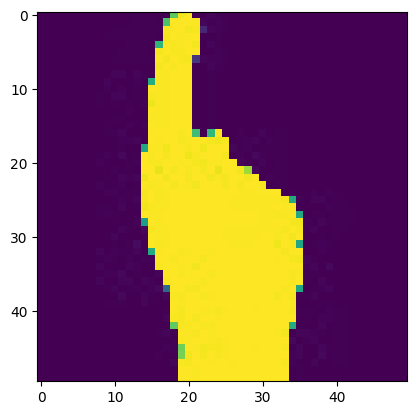

In [5]:
img_array1 = np.array(Image.open('/Users/rohansridhar/Desktop/rohan/internship_projects/hand_gesture/train/train/1/1.jpg'))
plt.imshow(img_array1)

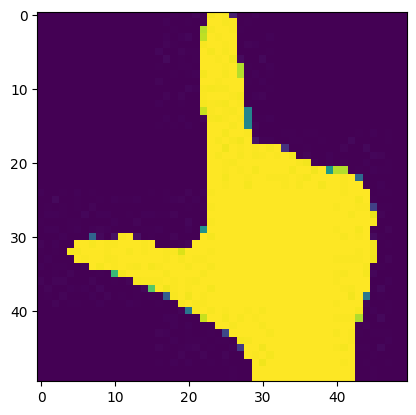

In [6]:
img_array2 = np.array(Image.open('/Users/rohansridhar/Desktop/rohan/internship_projects/hand_gesture/train/train/10/1.jpg'))
plt.imshow(img_array2)

Error in callback <function _draw_all_if_interactive at 0x11e98baf0> (for post_execute):


KeyboardInterrupt: 

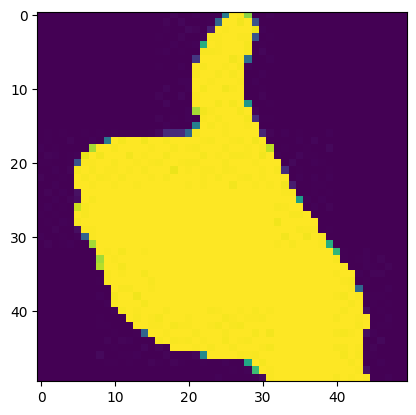

In [7]:
img_array3 = np.array(Image.open('/Users/rohansridhar/Desktop/rohan/internship_projects/hand_gesture/train/train/19/2.jpg'))
plt.imshow(img_array3)

In [ ]:

outputSize = len(os.listdir(train_dir)) 
epochs = 10 # Number of epochs

In [ ]:
#data-argumentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

# Doing the same as above for the validation directory
val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 18000 images belonging to 20 classes.
Found 6000 images belonging to 20 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

In [ ]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)


reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,reduce]

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization,Activation
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (256,256,1)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation = "softmax"))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 96)        0

In [ ]:
history = model.fit_generator(train_generator, epochs=epochs, verbose=1, validation_data=val_generator,callbacks=callbacks)

Epoch 1/10


/var/folders/9c/k2rvfmz92ld8z0rgrcsbrnl40000gn/T/ipykernel_1177/3709090794.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=epochs, verbose=1, validation_data=val_generator,callbacks=callbacks)


563/563 [==============================] - ETA: 0s - loss: 1.4795 - accuracy: 0.4984
Epoch 1: val_loss improved from inf to 0.27287, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets


INFO:tensorflow:Assets written to: ./base.model/assets


563/563 [==============================] - 981s 2s/step - loss: 1.4795 - accuracy: 0.4984 - val_loss: 0.2729 - val_accuracy: 0.9308 - lr: 0.0010
Epoch 2/10
563/563 [==============================] - ETA: 0s - loss: 0.5960 - accuracy: 0.7883
Epoch 2: val_loss improved from 0.27287 to 0.09099, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets


INFO:tensorflow:Assets written to: ./base.model/assets


563/563 [==============================] - 971s 2s/step - loss: 0.5960 - accuracy: 0.7883 - val_loss: 0.0910 - val_accuracy: 0.9862 - lr: 0.0010
Epoch 3/10
563/563 [==============================] - ETA: 0s - loss: 0.3835 - accuracy: 0.8639
Epoch 3: val_loss did not improve from 0.09099
563/563 [==============================] - 971s 2s/step - loss: 0.3835 - accuracy: 0.8639 - val_loss: 0.1210 - val_accuracy: 0.9790 - lr: 0.0010
Epoch 4/10
563/563 [==============================] - ETA: 0s - loss: 0.2870 - accuracy: 0.8986
Epoch 4: val_loss improved from 0.09099 to 0.01400, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets


INFO:tensorflow:Assets written to: ./base.model/assets


563/563 [==============================] - 972s 2s/step - loss: 0.2870 - accuracy: 0.8986 - val_loss: 0.0140 - val_accuracy: 0.9978 - lr: 0.0010
Epoch 5/10
563/563 [==============================] - ETA: 0s - loss: 0.2312 - accuracy: 0.9194
Epoch 5: val_loss did not improve from 0.01400
563/563 [==============================] - 971s 2s/step - loss: 0.2312 - accuracy: 0.9194 - val_loss: 0.0545 - val_accuracy: 0.9873 - lr: 0.0010
Epoch 6/10
563/563 [==============================] - ETA: 0s - loss: 0.1892 - accuracy: 0.9342  
Epoch 6: val_loss did not improve from 0.01400
563/563 [==============================] - 113312s 202s/step - loss: 0.1892 - accuracy: 0.9342 - val_loss: 0.0151 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 7/10
563/563 [==============================] - ETA: 0s - loss: 0.1738 - accuracy: 0.9403  
Epoch 7: val_loss did not improve from 0.01400

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
563/563 [==============================] - 38835s

INFO:tensorflow:Assets written to: ./base.model/assets


563/563 [==============================] - 999s 2s/step - loss: 0.1084 - accuracy: 0.9621 - val_loss: 0.0091 - val_accuracy: 0.9967 - lr: 1.0000e-04
Epoch 9/10
563/563 [==============================] - ETA: 0s - loss: 0.0940 - accuracy: 0.9684
Epoch 9: val_loss did not improve from 0.00906
563/563 [==============================] - 3674s 7s/step - loss: 0.0940 - accuracy: 0.9684 - val_loss: 0.0117 - val_accuracy: 0.9962 - lr: 1.0000e-04
Epoch 10/10
563/563 [==============================] - ETA: 0s - loss: 0.0779 - accuracy: 0.9735
Epoch 10: val_loss did not improve from 0.00906
563/563 [==============================] - 934s 2s/step - loss: 0.0779 - accuracy: 0.9735 - val_loss: 0.0127 - val_accuracy: 0.9955 - lr: 1.0000e-04


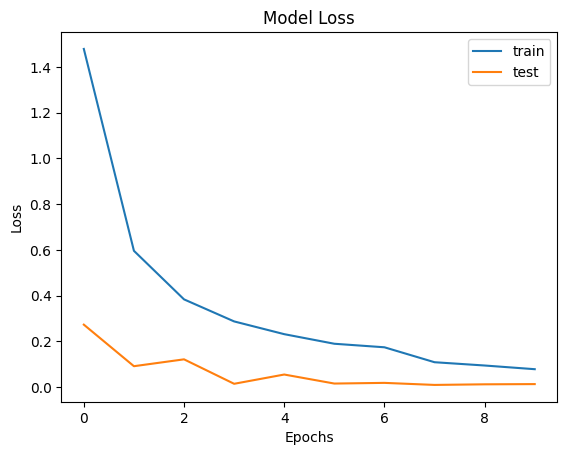

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# Model weights and model
model.save_weights('gesture_model_weights.h5')
model.save("gesture_model.h5")

/Users/rohansridhar/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [8]:
import tensorflow as tf

In [10]:
model.save(filepath="/Users/rohansridhar/Desktop/rohan/hand_gesture/gesture_model.h5") 

NameError: name 'model' is not defined

In [9]:
# model.save('HD_Model.h5')   #Saving H5 file filename.h5
converter = tf.lite.TFLiteConverter.from_saved_model('save_model')
tflite_model = converter.convert()
open("leaves_model.tflite", "wb").write(tflite_model)

OSError: SavedModel file does not exist at: save_model/{saved_model.pbtxt|saved_model.pb}